# Intrusion Detection System
---

## Load Preprocessed Data

In [1]:
# import pandas as pd

# # load dataset
# df = pd.read_csv('../data/preprocessed/binary_one_hot_min_max_small.csv')
# df.shape
# df.head()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,BENIGN,MALICIOUS
0,0.001221,3.838251e-01,0.000032,0.000027,3.744186e-05,3.216096e-06,0.018010,0.000000,0.010163,0.021926,...,2.346841e-04,0.000287,5.247273e-04,1.364455e-04,0.083274,0.000065,0.083297,0.083212,True,False
1,0.001221,1.333333e-07,0.000005,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,...,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,False,True
2,0.001221,8.224395e-01,0.000027,0.000017,2.511628e-05,1.769005e-05,0.013054,0.000000,0.007791,0.017186,...,4.545455e-08,0.000000,4.545455e-08,4.545455e-08,0.822500,0.000000,0.822500,0.822500,False,True
3,0.229480,9.036856e-02,0.000000,0.000017,4.651163e-07,4.576987e-08,0.000242,0.002581,0.001010,0.000000,...,3.101364e-04,0.000000,3.101364e-04,3.101364e-04,0.090000,0.000000,0.090000,0.090000,True,False
4,0.006760,5.702540e-01,0.000141,0.000110,1.717054e-04,7.884623e-06,0.015391,0.000000,0.011651,0.012809,...,2.673343e-02,0.000000,2.673343e-02,2.673343e-02,0.485000,0.000000,0.485000,0.485000,True,False


In [2]:
# # check for NaN values
# print(f"NaN Values : {df.isnull().sum().sum()}")

# # print Label value counts
# print(df[' Label'].value_counts())

NaN Values : 0
BENIGN
True     1617
False     383
Name: count, dtype: int64


## Create Small Dataset

In [19]:
# # create df with N samples of each class which holds at least N samples
# N = 2000
# small_df = pd.DataFrame()
# for label in df[' Label'].unique():
#     if df[df[' Label'] == label].shape[0] >= N:
#         small_df = pd.concat([small_df, df[df[' Label'] == label].sample(N)], ignore_index=True)
#     else:
#         small_df = pd.concat([small_df, df[df[' Label'] == label]], ignore_index=True)

# print(small_df[' Label'].value_counts())
# print('Shape: ', small_df.shape)

## Split Data

In [3]:
# from sklearn.model_selection import train_test_split

# # split data
# X = df.drop(columns=[' Label'])
# y = df[' Label']
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

---

In [21]:
# TODO: define whether to use binary or multiclass classification
multiclass = True

## Load Data Split

In [22]:
import pandas as pd

X_train = pd.read_csv("../CICIDS2017/train_test_split/X_train.csv")
X_test = pd.read_csv("../CICIDS2017/train_test_split/X_test.csv")
if multiclass:
    y_train = pd.read_csv("../CICIDS2017/train_test_split/y_train_multiclass.csv")
    y_test = pd.read_csv("../CICIDS2017/train_test_split/y_test_multiclass.csv")
else:
    y_train = pd.read_csv("../CICIDS2017/train_test_split/y_train.csv")
    y_test = pd.read_csv("../CICIDS2017/train_test_split/y_test.csv")
    
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(2120907, 70) (706969, 70) (2120907, 15) (706969, 15)


## Model Creation

In [15]:
# Create DNN model from tensorflow
import setuptools.dist # needed to avoid error
import tensorflow as tf
from tensorflow import keras

# normal keras model
# TODO: test with 40, 40, 20 and simple adam optimizer
# model = keras.Sequential()
# model.add(keras.layers.Dense(50, input_dim=X_train.shape[1], activation='relu')) # hidden layer
# model.add(keras.layers.Dense(30, activation='relu')) # hidden layer
# model.add(keras.layers.Dense(10, activation='relu')) # hidden layer
# model.add(keras.layers.Dense(1, activation='sigmoid')) # output layer

# keras model for handling one hot encoded labels -> needed for attack creation
model = keras.Sequential()
model.add(keras.layers.Dense(50, input_dim=X_train.shape[1], activation='relu')) # hidden layer
model.add(keras.layers.Dense(30, activation='relu')) # hidden layer
model.add(keras.layers.Dense(10, activation='relu')) # hidden layer
model.add(keras.layers.Dense(y_train.shape[1], activation='softmax'))  # Output layer with softmax for one-hot encoding

# set learning rate
opt = keras.optimizers.Adam(learning_rate=0.001)
# compile the keras model
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

/home/felix/Documents/Uni/Master Arbeit/Python/xai-assisted-intrusion-detection-system/.env/lib64/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


## Model Training

In [30]:
# fit the keras model on the dataset
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=100)

Epoch 1/10
21210/21210 ━━━━━━━━━━━━━━━━━━━━ 64s 3ms/step - accuracy: 0.9851 - loss: 0.0366 - val_accuracy: 0.9829 - val_loss: 0.0388
Epoch 2/10
21210/21210 ━━━━━━━━━━━━━━━━━━━━ 65s 3ms/step - accuracy: 0.9854 - loss: 0.0362 - val_accuracy: 0.9864 - val_loss: 0.0368
Epoch 3/10
21210/21210 ━━━━━━━━━━━━━━━━━━━━ 53s 2ms/step - accuracy: 0.9855 - loss: 0.0361 - val_accuracy: 0.9844 - val_loss: 0.0358
Epoch 4/10
21210/21210 ━━━━━━━━━━━━━━━━━━━━ 63s 3ms/step - accuracy: 0.9857 - loss: 0.0355 - val_accuracy: 0.9864 - val_loss: 0.0355
Epoch 5/10
21210/21210 ━━━━━━━━━━━━━━━━━━━━ 62s 3ms/step - accuracy: 0.9859 - loss: 0.0349 - val_accuracy: 0.9869 - val_loss: 0.0356
Epoch 6/10
21210/21210 ━━━━━━━━━━━━━━━━━━━━ 62s 3ms/step - accuracy: 0.9862 - loss: 0.0344 - val_accuracy: 0.9869 - val_loss: 0.0342
Epoch 7/10
21210/21210 ━━━━━━━━━━━━━━━━━━━━ 60s 3ms/step - accuracy: 0.9862 - loss: 0.0343 - val_accuracy: 0.9874 - val_loss: 0.0331
Epoch 8/10
21210/21210 ━━━━━━━━━━━━━━━━━━━━ 59s 3ms/step - accuracy: 

## Result Visualization

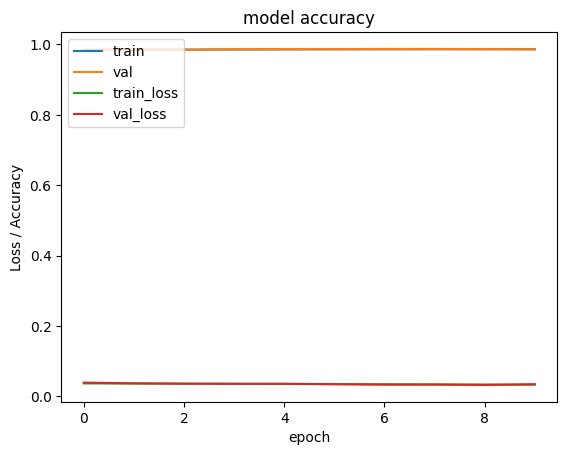

In [31]:
import matplotlib.pyplot as plt

history = model.history.history
# plot loss / accuracy vs epoch for train acc, validation acc, train loss, validation loss
plt.plot(history['accuracy'])
plt.plot(history['val_accuracy'])
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title('model accuracy')
plt.ylabel('Loss / Accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val', 'train_loss', 'val_loss'], loc='upper left')
plt.show()


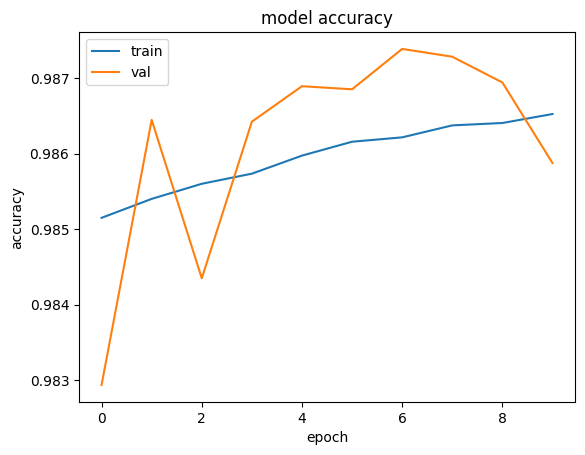

In [32]:
# plot training and validation accuracy over epochs
plt.plot(history['accuracy'])
plt.plot(history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

## Evaluation

In [33]:
import json


def get_label_encoding():
    if multiclass:
        with open("../CICIDS2017/preprocessed/multiclass_label_encoding.json", "r") as file:
            class_mapping = json.load(file)
    else: 
        with open("../CICIDS2017/preprocessed/binary_label_encoding.json", "r") as file:
            class_mapping = json.load(file)
    target_names = [class_mapping[str(i)] for i in range(len(class_mapping))]
    return target_names

In [34]:
# print accuracy, precision, recall and f1-score
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
import numpy as np

y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test.to_numpy(), axis=1)

# print accuracy
print(f"Global Accuracy: {accuracy_score(y_test_classes, y_pred_classes)*100:.2f}%")

# accuracy - one hot encoded
# [1, 0] == BENIGN
# [0, 1] == ATTACK
# print(f"Accuracy BENIGN: {accuracy_score(y_test[y_test['BENIGN'] == 1], y_pred[y_test['BENIGN'] == 1]):.2f}")
# print(f"Accuracy ATTACK: {accuracy_score(y_test[y_test['BENIGN'] == 0], y_pred[y_test['BENIGN'] == 0]):.2f}")
# print(f"Macro AVG Accuracy: {(accuracy_score(y_test[y_test['BENIGN'] == 1], y_pred[y_test['BENIGN'] == 1]) + accuracy_score(y_test[y_test['BENIGN'] == 0], y_pred[y_test['BENIGN'] == 0])) / 2:.2f}")
# print(f"Weighted AVG Accuracy: {accuracy_score(y_test, y_pred):.2f}")


# precision, recall, f1-score
print(classification_report(y_test_classes, y_pred_classes, target_names=get_label_encoding(), zero_division=0))


22093/22093 ━━━━━━━━━━━━━━━━━━━━ 23s 1ms/step
Global Accuracy: 98.59%
                          precision    recall  f1-score   support

                  BENIGN       0.99      0.99      0.99    567502
                     Bot       0.98      0.37      0.54       493
                    DDoS       1.00      1.00      1.00     32136
           DoS GoldenEye       0.99      0.97      0.98      2547
                DoS Hulk       0.97      0.99      0.98     57660
        DoS Slowhttptest       0.98      0.98      0.98      1406
           DoS Slowloris       0.98      0.98      0.98      1442
             FTP-Patator       1.00      0.99      1.00      1983
              Heartbleed       1.00      1.00      1.00         3
            Infiltration       0.00      0.00      0.00        11
                PortScan       0.91      0.93      0.92     39787
             SSH-Patator       0.96      0.96      0.96      1454
  Web Attack Brute Force       1.00      0.06      0.10       379
Web A

## Export Model

In [35]:
# export model
if multiclass:
    model.save('../CICIDS2017/models/ids_dnn_multiclass.keras')
else:
    model.save('../CICIDS2017/models/ids_dnn.keras')